In [ ]:
## This notebook provides a tutorial to calculate PhyloFunc distance using PhyloFunc package
## Users can use pip to install PhyloFunc: 
!pip install PhyloFunc 

In [1]:
import pandas as pd

In [ ]:
# Step1: Prepare a phylogeny-informed Taxon-Function table in CSV format. 
## Table Instructions:
### Include Taxa IDs, functional accessions, and protein intensity.
### Column names are: Taxon, Function, and sample names for the metaproteomic intensity data.

## The example dataset shows an in vitro human gut microbiome cultured in a RapidAIM assay,
## with or without the presence different concentrations of diclofenac (DCLF).
Taxon_Function = pd.read_csv("Taxon_Function_distance.csv", sep = ',')

# Additional notes
## "Taxon" in the example data refers to Genome IDs in the MGYG (UHGG) database.
## To use the embedded UHGG tree file, users can search with MetaLab-MAG or their own UHGG database.
## Genome ids can be extracted from the protein groups.

In [13]:
# Step2.1: import PhyloFunc package and calculate the PhyloFunc distance 
## The PhyloFunc_distance function takes a CSV file as input
from PhyloFunc import PhyloFunc_distance
## UHGG-based tree is automatically called within the function
## If user use self-defined tree, use the tree_file='user_tree_file.nwk' option.
PhyloFunc_distance(sample_file="Taxon_Function_distance.csv")

All 'MGYG' taxa in the sample data are present as leaf nodes in the tree.
The optimized PhyloFunc distance between "DC.M.48.1" and "DC.H.48.1" is 0.8321142921985824.
Finish, time consumed: 67.42 seconds


In [15]:
# Step2.2: calculate PhyloFunc distance matrix across all samples
## This may take around an hour for the example dataset.

from PhyloFunc import PhyloFunc_matrix

PhyloFunc_distance_matrix=PhyloFunc_matrix(sample_file="Taxon_Function_matrix.csv")

All 'MGYG' taxa in the sample data are present as leaf nodes in the tree.
The PhyloFunc distance between "DC.M.48.1" and "DC.H.48.1" is 0.8321142921985824.
The PhyloFunc distance between "DC.M.48.1" and "DC.M.48.2" is 0.2394535190584824.
The PhyloFunc distance between "DC.M.48.1" and "NC.1D.48.1" is 0.43678643420648283.
The PhyloFunc distance between "DC.M.48.1" and "DC.H.48.2" is 0.8123061121497435.
The PhyloFunc distance between "DC.M.48.1" and "DC.L.48.1" is 0.42088500449121574.
The PhyloFunc distance between "DC.M.48.1" and "NC.1D.48.2" is 0.48320670447482517.
The PhyloFunc distance between "DC.M.48.1" and "DC.L.48.2" is 0.37603616054554106.
The PhyloFunc distance between "DC.M.48.1" and "DC.L.48.3" is 0.4044582725811166.
The PhyloFunc distance between "DC.M.48.1" and "DC.H.48.3" is 0.8241333657248588.
The PhyloFunc distance between "DC.M.48.1" and "DC.M.48.3" is 0.2727916696176611.
The PhyloFunc distance between "DC.M.48.1" and "NC.1D.48.3" is 0.42575166157275796.
The PhyloFunc di

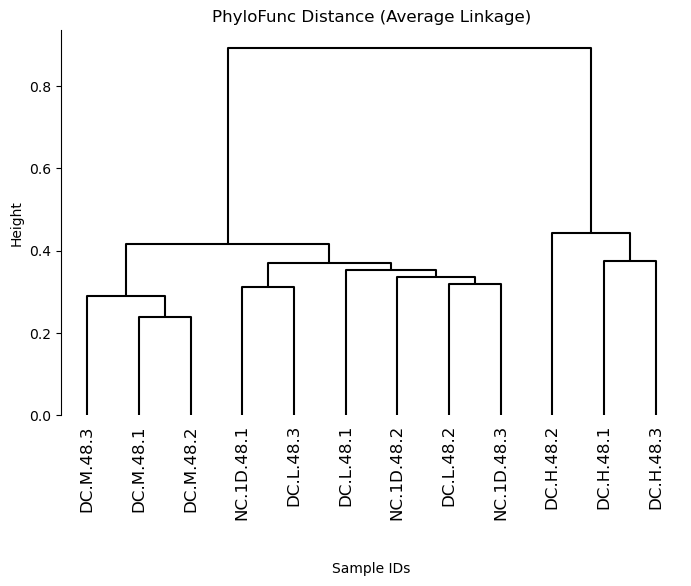

In [16]:
# Step3: Draw a hierarchical clustering plot based on the resulting PhyloFunc distance matrix
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import pandas as pd

# Generate distance 
data_PhyloFunc = PhyloFunc_distance_matrix.T
data_PhyloFunc_array = squareform(data_PhyloFunc)
linkage_PhyloFunc = linkage(data_PhyloFunc_array, method='average')

# Create a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

dendrogram_kwargs = dict(leaf_rotation=90, color_threshold=0, above_threshold_color='black')

# Plot bierarchical clustering
dendrogram(linkage_PhyloFunc, ax=ax, labels=data_PhyloFunc.index, **dendrogram_kwargs)
ax.set_title('PhyloFunc Distance (Average Linkage)')
ax.set_ylabel('Height')

# Add annotation text
ax.text(0.5, -0.4, "Sample IDs",
        ha='center', va='center', transform=ax.transAxes, fontsize=10)

# Adjust axis style
def style_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
style_axes(ax)
plt.show()